# <span style="color:darkblue"> Lecture 3c: Transform </span>

<font size = "5">

This is a complement to Lecture 3b


# <span style="color:darkblue"> I. Import Libraries and Data </span>


<font size = "5">
Key libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("data_raw/results.csv")

# <span style="color:darkblue"> II. Transform + Groupby </span>



<font size = "5">

Adding columns with grouped aggregate statistics

<img src="figures/transform_stats.png" alt="drawing" width="300"/>


In [3]:
# We've use "transform" to compute a column with aggregate statistics
# If we add the pipe "groupby" the aggregate statistics are computed by group
# with group level averages.
# We can use any aggregate function, including "mean", "std", "max","min", etc.

results["mean_points_driver"] = results.groupby("driverId")["points"].transform("mean")
results["std_points_driver"]  = results.groupby("driverId")["points"].transform("std")


<font size = "5">

Computing the rank


In [4]:
# The rank function calculates the relative position
# The option 'method = "dense"' options gives multiple individuals
# the same rank if there is a tie
# The option 'ascending = False' indicates the the person with the lowest
# score is "1", the second lowest is "2", etc.

results["rank_points"] = results["points"].rank(method = "dense",
                                                ascending = False)

Text(0.5, 0, 'Relative Ranking')

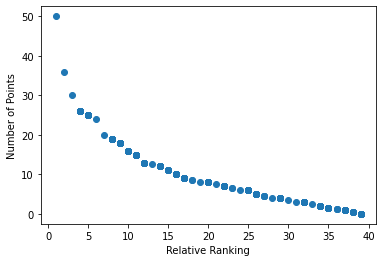

In [5]:
# The graph shows that the winner gets 50 points
plt.scatter(x = results["rank_points"],y = results["points"])
plt.ylabel("Number of Points")
plt.xlabel("Relative Ranking")

<font size = "5">

Computing the rank by group

In [8]:
# The subfunction "transform" allows us to pass-along some of the options

results["rank_points_withinteam"] = (results.groupby("constructorId")["points"]
                                            .transform("rank",
                                                       method = "dense",
                                                       ascending = True))
results["rank_points_withinteam"]

0        13.0
1         8.0
2         9.0
3         6.0
4         6.0
         ... 
25835     1.0
25836     1.0
25837     1.0
25838     1.0
25839     1.0
Name: rank_points_withinteam, Length: 25840, dtype: float64